In [36]:
import os
import numpy as np
import shapely as shp
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import plot as rasterplot

In [37]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [38]:
image = rio.open(cwd_Images_Processed + "\\ATLAS-Mohammed V\\False RGB Stacked.tif")
image.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32630),
 'transform': Affine(10.0, 0.0, 300000.0,
        0.0, -10.0, 3800040.0)}

In [39]:
shp = gpd.read_file(cwd_Images_Processed + "\\ATLAS-Mohammed V\\1200m.shp")
shp.bounds

,minx,miny,maxx,maxy
0,303800.0,3697690.0,305010.0,3698900.0


In [40]:
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

nir = image.read(3)
red = image.read(2)
green = image.read(1)
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

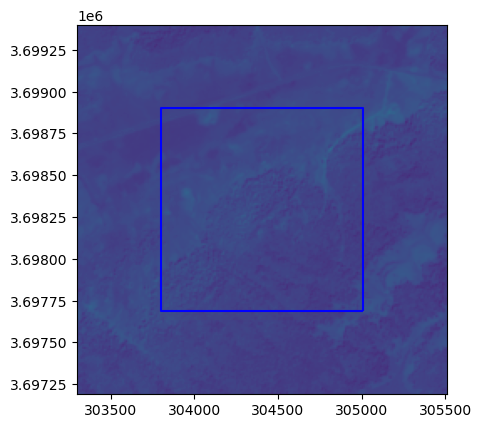

In [46]:
f, ax = plt.subplots()
from rasterio.plot import show
# plot DEM
show(image, cmap = 'viridis', ax = ax)
# plot shapefiles
shp.boundary.plot(ax=ax, facecolor='#00000000', edgecolor='Blue')
# plt.savefig('test.jpg')
plt.xlim(shp.bounds.values.reshape(-1)[0] - 500,shp.bounds.values.reshape(-1)[2] + 500)
plt.ylim(shp.bounds.values.reshape(-1)[1] - 500,shp.bounds.values.reshape(-1)[3] + 500)
plt.show()